[[ 0.49098656 -0.06062752]
 [-0.06062752  1.18841945]]
[[[ 3.50272033]
  [ 1.20173557]]

 [[ 4.25666231]
  [-3.05764277]]

 [[-4.67552909]
  [ 2.09621762]]

 [[ 4.86906685]
  [-4.29513897]]]


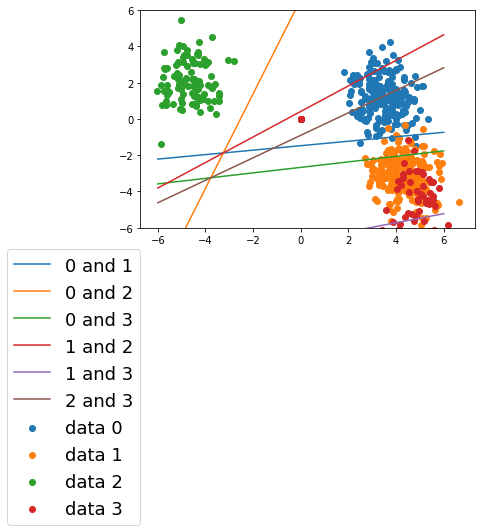

In [199]:
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.patches as pat;
import scipy as sc;

# Ns = [1000,1000, 500, 500, 200, 200, 100, 100, 50, 50];
Ns = [200, 200, 100, 50]
K = len (Ns);
dim = 2;

# mu = 30 * (np.random.rand (K, dim) - 0.5)
mu = 10 * (np.random.rand (K,dim) - 0.5)

sigma = np.array([[0.5,0],[0,1]]);

X = np.zeros ((K, dim, max (Ns)))
for k in range (K):
    X[k,:,0:Ns[k]] = sc.linalg.sqrtm (sigma).dot (np.random.randn (dim,Ns[k])) + mu[k,:].reshape (dim,1);

for k in range (K):
    plt.scatter (X[k,0,:], X[k,1,:], label="data "+str(k));
# plt.show ();


# LDA
N = np.sum (Ns);
p_pi = Ns / N;
p_mu = np.zeros ((K,dim,1));
p_sigma_k = np.zeros ((K,dim,dim));
for k in range (K):
    p_mu_k = np.sum (X[k,:,:], axis=1) / Ns[k];
    p_mu[k] = p_mu_k.reshape (dim, 1);
    p_sc = X[k,:,:] - p_mu_k.reshape (dim,1)
    for n in range (Ns[k]):
        tmp = p_sc[:,n].reshape (dim,1);
        p_sigma_k[k,:,:] = p_sigma_k[k,:,:] + tmp.dot(tmp.T);

p_sigma = np.sum (p_sigma_k, axis=0) / (N-K);
print (p_sigma);
print (p_mu);


x = np.linspace (-6,6);
for k in range (K):
    for l in range (k+1,K):
        y = p_sigma[0,:].dot (p_mu[k] - p_mu[l])*x + np.log (p_pi[k]/p_pi[l]) - (p_mu[k]+p_mu[l]).T.dot (np.linalg.inv (p_sigma)).dot (p_mu[k]-p_mu[l]) / 2;
        # print (-y/p_sigma[1,:].dot(p_mu[k] - p_mu[l]))
        plt.plot (x,(-y/(p_sigma[1,:].dot(p_mu[k] - p_mu[l]))).reshape (50,1), label=str(k)+" and "+str(l));
        

plt.ylim (-6, 6);
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper right', borderaxespad=0, fontsize=18)





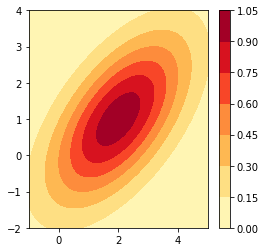

In [13]:
import numpy as np;
import matplotlib.pyplot as plt;

N = 1000;

S_inv = np.array ([[0.25,0],[0,1]]);
P = np.array ([[1, -1], [1, 1]]) / np.sqrt(2);
Sigma = P.dot (S_inv). dot (P.T);


x = np.linspace (-1,5,N);
y = np.linspace (-2,4,N);
X, Y = np.meshgrid (x,y);
Prob = np.exp (-(Sigma[0,0]*(X-2)**2 + 2*Sigma[0,1]*(X-2)*(Y-1) + Sigma[1,1]*(Y-1)**2)/2);
fig = plt.figure (figsize=(4, 4));
ax = fig.add_subplot (111);
surf = ax.contourf (X, Y, Prob, cmap='YlOrRd');
fig.colorbar(surf)